In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import sqlite3
import os
import sys

#
# next most important packages are statsmodels , seaborn , 
#
#

df_ppq = pd.read_csv('out.ppq.allpatients.v20240318.csv')
df_dha = pd.read_csv('out.dha.allpatients.v20240318.csv')
df_lum = pd.read_csv('out.lum.allpatients.v20240326.csv')


df_lum.describe()


,PID,HOUR,COMP2CONC,PARASITEDENSITY
count,672000.000000,672000.00000,672000.000000,672000.000000
mean,499.500000,335.50000,2013.281285,1043.840241
std,288.675205,193.98962,6151.540734,142.230706
min,0.000000,0.00000,0.000000,-2843.235000
25%,249.750000,167.75000,3.436000,1000.000000
50%,499.500000,335.50000,54.120000,1006.690500
75%,749.250000,503.25000,944.552250,1030.840000
max,999.000000,671.00000,118113.445000,1269.503000


In [2]:
df_lum['PID']

print( df_lum.shape )
print( df_lum.shape[0] )
print( df_lum['HOUR'].shape )
print( df_lum['HOUR'].shape[0] )


(672000, 4)
672000
(672000,)
672000


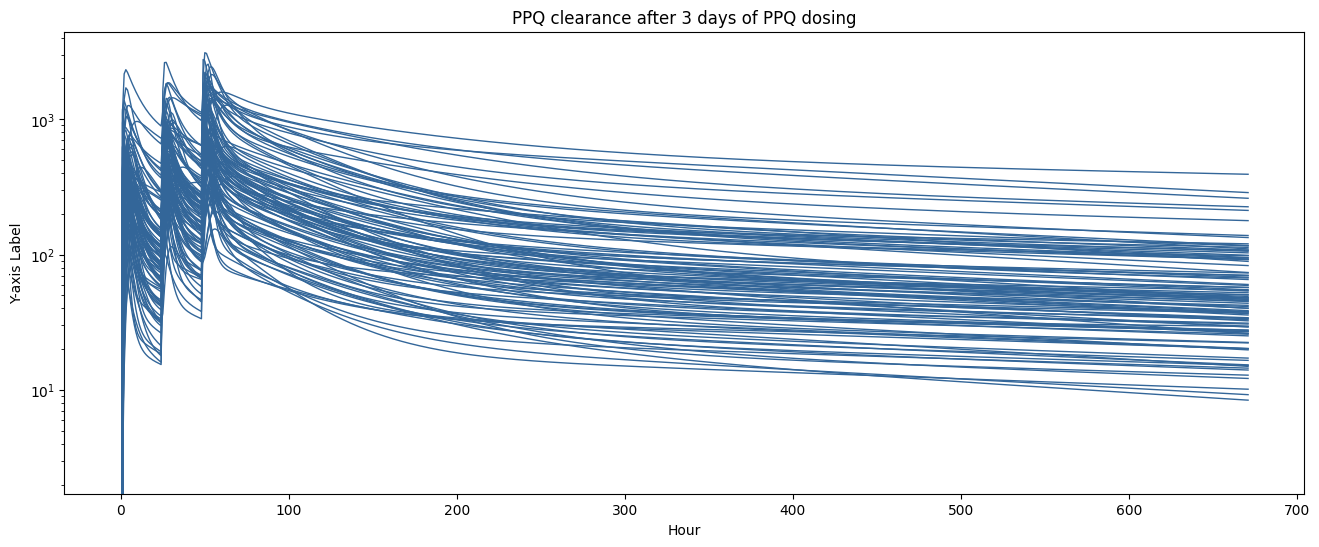

In [3]:
plt.figure( figsize=(16,6) )

#lines_data = 
#    {'label': 'Line {}'.format(i+1), 'y_values': [2*(i+1) for _ in x_values], 'color': 'C{}'.format(i)} 
#    for i in range(25)
#]

line_color = 'blue'
line_color_rgb = (0.2, 0.4, 0.6)

# all unique patient IDs
all_patient_ids = df_ppq['PID'].unique()

numhours = 0

# Plotting the lines using a loop
for pid in all_patient_ids:
    
    df =  df_ppq[df_ppq['PID'] == pid]

    # plt.plot(df_summed_foreach_month['monthlydataid'], df_summed_foreach_month['treatmentfailures'], marker='.', color = line_color)
    plt.plot(df['HOUR'], df['COMP2CONC'], color = line_color_rgb, linewidth=1)

    numhours = df.shape[0] # this just gets you the number of rows


# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Y-axis Label')
plt.title('PPQ clearance after 3 days of PPQ dosing')

# Adding a legend
#plt.legend()

plt.yscale('log')

# Display the plot
plt.show()


(672, 100)
(672, 5)


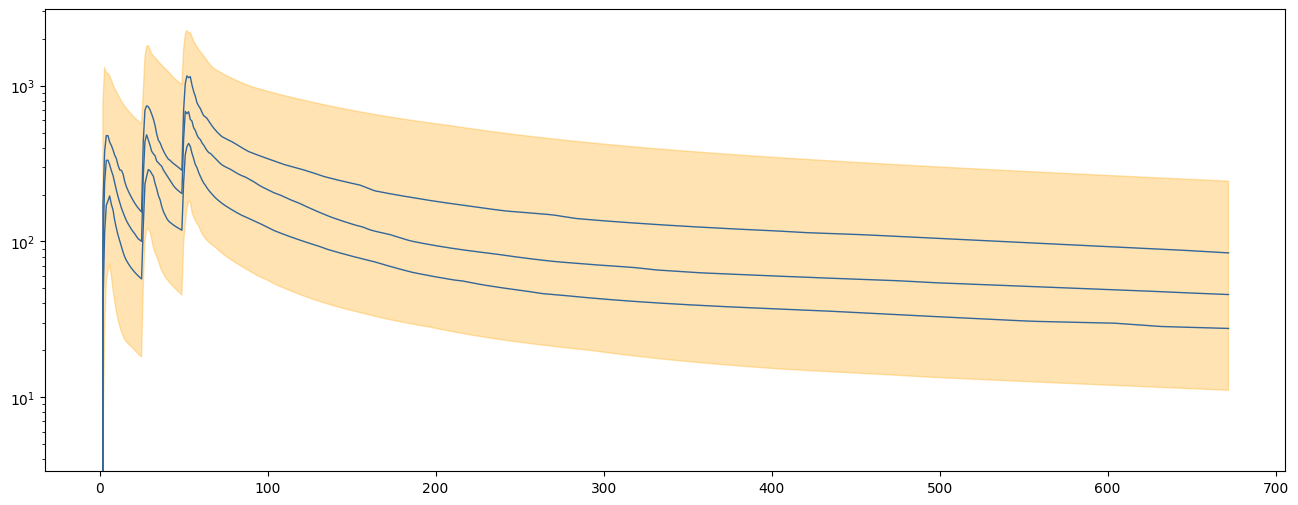

In [4]:
N = all_patient_ids.size
# and then 'numhours' is the number of hours

A = np.zeros((numhours,N))

c=0

for pid in all_patient_ids:
    
    df =  df_ppq[df_ppq['PID'] == pid]

    A[:,c] = df['COMP2CONC'].values

    c = c + 1

B = np.quantile(A, q=[0.025, 0.25,0.50,0.75, 0.975], axis=1)
B = B.transpose()

print( A.shape )
print( B.shape )

xx=np.arange(1,numhours+1)

yy1 = B[:,0]
yy2 = B[:,4]
plt.figure( figsize=(16,6) )
plt.fill_between(xx, yy1, yy2, color='orange', alpha=0.3)


plt.plot(xx, B[:,1], color = line_color_rgb, linewidth=1)
plt.plot(xx, B[:,2], color = line_color_rgb, linewidth=1)
plt.plot(xx, B[:,3], color = line_color_rgb, linewidth=1)



plt.yscale('log')

plt.show()


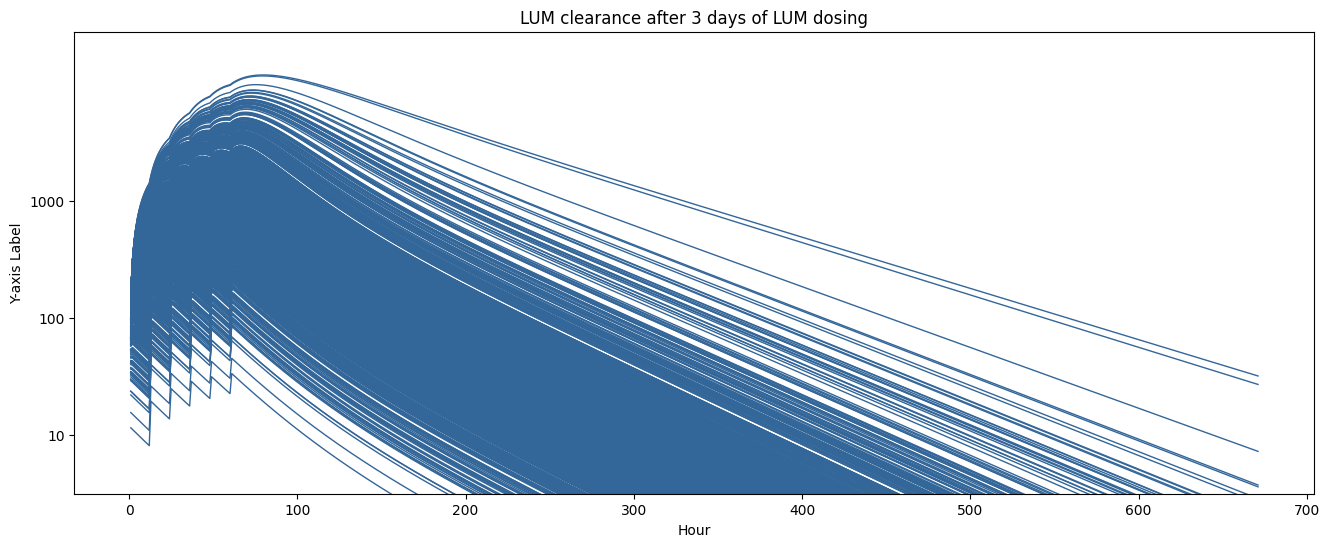

In [5]:
plt.figure( figsize=(16,6) )

line_color = 'blue'
line_color_rgb = (0.2, 0.4, 0.6)

# all unique patient IDs
all_patient_ids = df_lum['PID'].unique()

numhours = 0

# Plotting the lines using a loop
for pid in all_patient_ids:
    
    df =  df_lum[df_lum['PID'] == pid]

    # plt.plot(df_summed_foreach_month['monthlydataid'], df_summed_foreach_month['treatmentfailures'], marker='.', color = line_color)
    plt.plot(df['HOUR'], df['COMP2CONC'].apply(np.log10), color = line_color_rgb, linewidth=1)

    numhours = df.shape[0] # this just gets you the number of rows


# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Y-axis Label')
plt.title('LUM clearance after 3 days of LUM dosing')

plt.ylim(1.5)
# Adding a legend
#plt.legend()
yticks = [ 2, 3, 4 ]
yticklabels = [ '10', '100', '1000']
plt.yticks(yticks, yticklabels, rotation=0)

# Display the plot
        


plt.show()




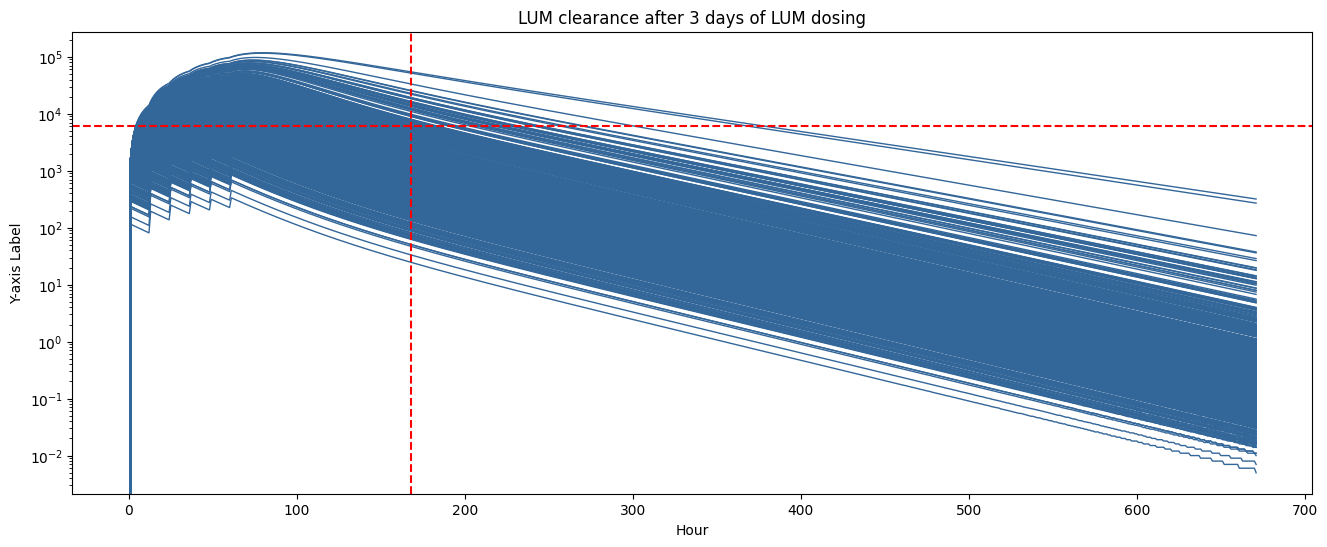

In [6]:
plt.figure( figsize=(16,6) )

line_color = 'blue'
line_color_rgb = (0.2, 0.4, 0.6)

# all unique patient IDs
all_patient_ids = df_lum['PID'].unique()

numhours = 0

# Plotting the lines using a loop
for pid in all_patient_ids:
    
    df =  df_lum[df_lum['PID'] == pid]

    # plt.plot(df_summed_foreach_month['monthlydataid'], df_summed_foreach_month['treatmentfailures'], marker='.', color = line_color)
    plt.plot(df['HOUR'], df['COMP2CONC'], color = line_color_rgb, linewidth=1)

    numhours = df.shape[0] # this just gets you the number of rows


# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Y-axis Label')
plt.title('LUM clearance after 3 days of LUM dosing')

#plt.ylim(1.5)
# Adding a legend
#plt.legend()

# Display the plot
        
plt.axhline(y=6000, color='red', linestyle='--')
plt.axvline(x=168, color='red', linestyle='--')

plt.yscale('log')

plt.show()



(672, 1000)
(672, 5)


<Figure size 1200x1200 with 0 Axes>

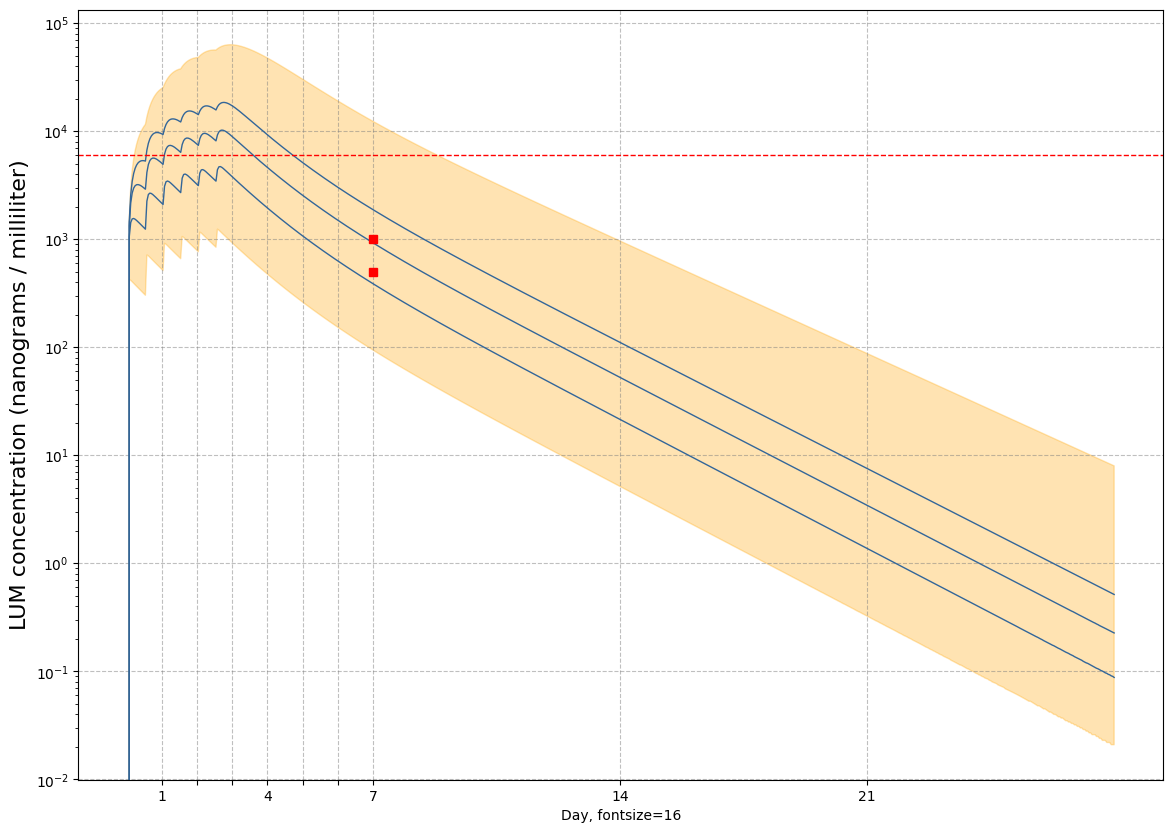

In [9]:
plt.figure( figsize=(12,12) )
N = all_patient_ids.size
# and then 'numhours' is the number of hours

A = np.zeros((numhours,N))

c=0

for pid in all_patient_ids:
    
    df =  df_lum[df_lum['PID'] == pid]

    A[:,c] = df['COMP2CONC'].values

    c = c + 1

B = np.quantile(A, q=[0.025, 0.25,0.50,0.75, 0.975], axis=1)
B = B.transpose()

print( A.shape )
print( B.shape )

xx=np.arange(1,numhours+1)

yy1 = B[:,0]
yy2 = B[:,4]
plt.figure( figsize=(16,6) )
plt.fill_between(xx, yy1, yy2, color='orange', alpha=0.3)


plt.plot(xx, B[:,1], color = line_color_rgb, linewidth=1)
plt.plot(xx, B[:,2], color = line_color_rgb, linewidth=1)
plt.plot(xx, B[:,3], color = line_color_rgb, linewidth=1)

plt.plot(168, 1000, marker='s', color='red')
plt.plot(168, 500, marker='s', color='red')
plt.axhline(y=6000, color='red', linestyle='--', linewidth=1)

xticks = [ 24, 48, 72, 96, 120, 144, 168, 336, 504 ]
xticklabels = [ '1', '', '', '4', '', '', '7', '14', '21']
plt.xticks(xticks, xticklabels, rotation=0)

yticks = [ 1, 10, 100, 1000, 10000 ]
#xticklabels = [ '1', '', '', '4', '', '', '7', '14', '21']
plt.yticks(yticks, rotation=0)

#plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.grid(True, which='major', linestyle='--', color='gray', alpha=0.5)
plt.yscale('log')

plt.xlabel('Day, fontsize=16')
plt.ylabel('LUM concentration (nanograms / milliliter)', fontsize=16)

plt.gcf().set_size_inches(14, 10)

plt.show()

In [8]:
# A = df.groupby('monthlydataid')

# this returns something called a DataFrameGroupBy object, which is made, almost certaintly,
# by calling unique on the monthlydataid column, using it as a set of keys in a dict (or a Panda series object), and then
#
#       1. either breaking the dataframe up into virtual smaller sub-dataframes where the monthlydataid variable is the same 
#           in each dataframe ... so you just sum, mean, median, count the columns and return the result as the value for the
#           key that corresponds to that sub-df's monthlydataid value
#       2. or, you simply create a df with a single new attribute "column name" that tells you which column needs to be uniqued and 
#           summed/meaned/medianed/counted when a call like sum is made to this object; you don't sum/median/mean that one column, you
#           do it a bunch of times on that column depending on the monthlydataid value, and then you return everything as a Panda series
#           which is essentially a dict (but simpler and less general)